---
# Préparation des données

---


Pour préparer adéquatement les données avant de les fournir à un ou plusieurs algorithmes d'apprentissage automatique, il faut également s'assurer de l'intégrité de ces données pour ne pas fournir de valeurs manquantes aux algorithmes qui pourraient alors donner une valeur manquante à leur tour.

<center><img src="./img/mlprocess_2.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

1. Le nettoyage et les aberrations statistiques
2. **L'imputation de données manquantes**
3. Équilibrage de données déséquilibrées
4. Transformation des caractéristiques
    1. *rescaling* et *normalizing* (\[0, 1\] ou \[-1, 1\]), *standardizing* (loi normale)
    2. Représentation matricielle de données catégorisées
    3. Réduction de la dimensionnalité ou création de caractéristiques





## 2. Imputation des données manquantes 
Si vous voulez faire simple : `scikit-learn` offre un [`SimpleImputer`](http://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) et un [`MissingIndicator`](http://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator) alors que `pandas` offre la méthode [`fillna()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).
Sinon, utilisez les fonctionalités de la librairie [`impypute`](https://pypi.org/project/impyute/):
- Outils de diagnostic
     - Journaux
     - Distribution des valeurs nulles
     - Comparaison des imputations
     - [Test MCAR de Little](https://impyute.readthedocs.io/en/latest/user_guide/diagnostics.html#little-s-mcar-test-1)
- Imputation de données transversales
     - Imputation aléatoire
     - K-voisins les plus proches
     - Imputation moyenne
     - Imputation par mode
     - Imputation médiane
     - Imputation multivariée par équations chaînées ([MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/))
     - Espérance/maximisation
- Imputation de données chronologiques
     - Dernière observation reportée
     - Fenêtre mobile
     - Moyenne mobile intégrée autorégressive (WIP)
     
Ou bien : [`fancyimpute`](https://pypi.org/project/fancyimpute/) :
* `SimpleFill`: Remplace les entrées manquantes par la moyenne ou la médiane de chaque colonne.
* `KNN`: Imputations du voisin le plus proche qui pondère les échantillons en utilisant la différence quadratique moyenne sur les entités pour lesquelles deux lignes contiennent des données observées.
* `SoftImpute`: Complétion de la matrice par seuillage souple itératif des décompositions SVD. Inspiré de la librairie [softImpute](https://web.stanford.edu/~hastie/swData/softImpute/vignette.html) pour R, basé sur [Spectral Regularization Algorithms for Learning Large Incomplete Matrices](http://web.stanford.edu/~hastie/Papers/mazumder10a.pdf) de Mazumder et. Al.
* `IterativeSVD`: Achèvement de la matrice par décomposition itérative SVD de bas rang. Devrait être similaire à SVDimpute de [Missing value estimation methods for DNA microarrays](http://www.ncbi.nlm.nih.gov/pubmed/11395428) de Troyanskaya et. Al.
* `IterativeImputer` (ex MICE): Une stratégie pour imputer les valeurs manquantes en modélisant chaque entité avec des valeurs manquantes en fonction des autres entités de manière alternée.
* `MatrixFactorization`: Factorisation directe de la matrice incomplète en« U »et« V »de bas rang, avec une pénalité de faible densité L1 sur les éléments de« U »et une pénalité de L2 sur les éléments de« V ». Résolu par descente progressive.
* `NuclearNormMinimization`: Implémentation simple de [Exact Matrix Completion via Convex Optimization](http://statweb.stanford.edu/~candes/papers/MatrixCompletion.pdf) d'Emmanuel Candes et Benjamin Recht utilisant [cvxpy](http://www.cvxpy.org). Algorithme trop lent pour les grandes matrices.
* `BiScaler`: Estimation itérative de la moyenne des rangées/colonnes et des écarts types pour obtenir une double normalisation. Pas garanti de converger, mais fonctionne bien dans la pratique. Tiré de [Matrix Completion and Low-Rank SVD via Fast Alternating Least Squares](http://arxiv.org/abs/1410.2596).

Essayons de manipuler des données manquantes provenant de la compétition Kaggle sur le Titanic[$^1$](https://www.kaggle.com/c/titanic):

Nous aurons à retravailler dessus lors des exercices de classification (Module 3)

### Chargement des données

 - survival: Survival (0 = No, 1 = Yes)
 - pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
 - sex: Sex
 - Age: Age in years
 - sibsp: Number of siblings / spouses aboard the Titanic
 - parch: Number of parents / children aboard the Titanic
 - ticket: Ticket number
 - name: Passenger name
 - fare: Passenger fare
 - embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import wget

!rm './titanic_train.csv' './titanic_test.csv'
wget.download('https://raw.githubusercontent.com/iid-ulaval/EEAA-datasets/master/titanic_train.csv','./titanic_train.csv')
wget.download('https://raw.githubusercontent.com/iid-ulaval/EEAA-datasets/master/titanic_test.csv','./titanic_test.csv')


np.random.seed(0)

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


100% [..............................................................................] 23887 / 23887

Création des types de colonnes.

(On vous laisse deviner ce que ca fait, mais posez la question sur le forum si jamais ce n'est pas clair.)

In [2]:
import sys
import warnings

def enforceTypesTitanic(df):
    Pclass_dtype = pd.api.types.CategoricalDtype(categories=[1, 2, 3], ordered=True)
    df.Survived = df.Survived.astype("category")
    df.Pclass = df.Pclass.astype(Pclass_dtype)
    df.Sex = df.Sex.astype("category")
    df.Embarked = df.Embarked.astype("category")
    df = df.drop('Name', axis=1)
    df = df.drop('Ticket', axis=1)
    df = df.drop('index', axis=1)
    return df


train = enforceTypesTitanic(train)
test = enforceTypesTitanic(test)

Comptage des valeurs nulles dans le dataset (`train` et `test`):

In [3]:
def naSummary(df):
    return df.isnull().sum()

naSummary(train)

Unnamed: 0      0
Pclass          0
Survived        0
Sex             0
Age           263
SibSp           0
Parch           0
Fare            1
Embarked        2
dtype: int64

In [4]:
naSummary(test)

Unnamed: 0    0
Pclass        0
Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Validation de l'équilibre de la distribution des données Train vs Test

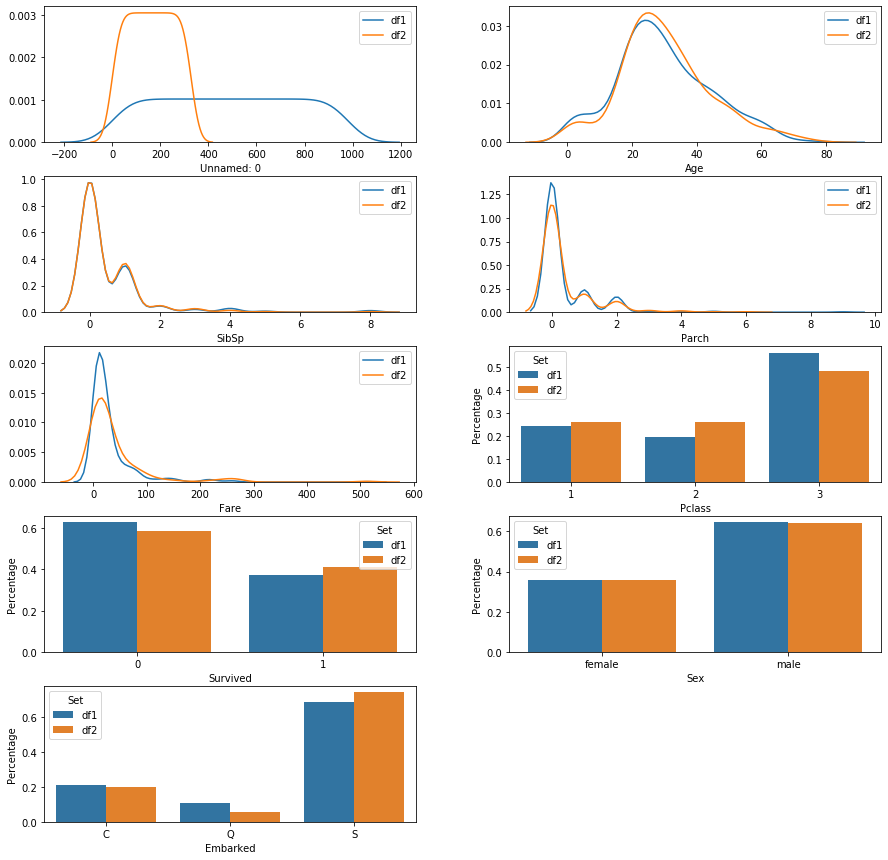

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools

# Si vous avez statsmodels installé, 
sns.distributions._has_statsmodels=False

# Calculer la taille de la grille en fonction du nombre de caractéristiques 
def gridSize(nb_features):
    a = len(nb_features)
    if a%2 != 0:
        a += 1
    n = np.floor(np.sqrt(a)).astype(np.int64)
    while a%n != 0:
        n -= 1
    m = (a/n).astype(np.int64)
    return m,n

# Affichage des deux distributions pour chaque colonne des dataframes 1 et 2
def distComparison(df1, df2):
    
    assert (len(df1.columns) == len(df2.columns))
    
    m,n = gridSize(df1.columns)
    coords = list(itertools.product(list(range(m)), list(range(n))))
    
    # Choix des graphiques pour chaque type de colonne
    numerics = df1.select_dtypes(include=[np.number]).columns
    cats = df1.select_dtypes(include=['category']).columns
    
    fig = plt.figure(figsize=(15, 15))
    axes = gs.GridSpec(m, n)
    axes.update(wspace=0.25, hspace=0.25)
    # Graphiques pour données numériques : on fait un KDE de la distribution
    for i in range(len(numerics)):
        x, y = coords[i]
        ax = plt.subplot(axes[x, y])
        col = numerics[i]

        sns.kdeplot(df1[col].dropna(), ax=ax, label='df1').set(xlabel=col)
        sns.kdeplot(df2[col].dropna(), ax=ax, label='df2')
        
    # Graphique pour les données catégoriques : diagramme en bâtons
    for i in range(0, len(cats)):
        x, y = coords[len(numerics)+i]
        ax = plt.subplot(axes[x, y])
        col = cats[i]

        df1_temp = df1[col].value_counts()
        df2_temp = df2[col].value_counts()
        df1_temp = pd.DataFrame({col: df1_temp.index, 'value': df1_temp/len(df1), 'Set': np.repeat('df1', len(df1_temp))})
        df2_temp = pd.DataFrame({col: df2_temp.index, 'value': df2_temp/len(df2), 'Set': np.repeat('df2', len(df2_temp))})

        sns.barplot(x=col, y='value', hue='Set', data=pd.concat([df1_temp, df2_temp]), ax=ax).set(ylabel='Percentage')

# Affichage de la comparaison entre les données de train et de test (sans la colonne des étiquettes.) 
distComparison(train, test)

On crée une baseline en complétant arbitrairement les données manquantes.

In [6]:
# Embarked est le port d'embarquement, on complète les données manquantes par le premier port.
train.Embarked = train.Embarked.fillna('C')

# Il manque une donnée de prix payé pour le billet; choisissons une valeur arbitraire.
train.Fare = train.Fare.fillna(8.05)


In [7]:
naSummary(train)

Unnamed: 0      0
Pclass          0
Survived        0
Sex             0
Age           263
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [8]:
naSummary(test)

Unnamed: 0    0
Pclass        0
Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Les données sont elles MCAR ?

MCAR = missing completely at random.

Essentiellement, divisons les données en deux ensembles supplémentaires: Données manquantes et données présentes. Puis vérifions que, si la distribution des variables dans chacun de ces ensembles est la même, alors les données manquent complètement au hasard.

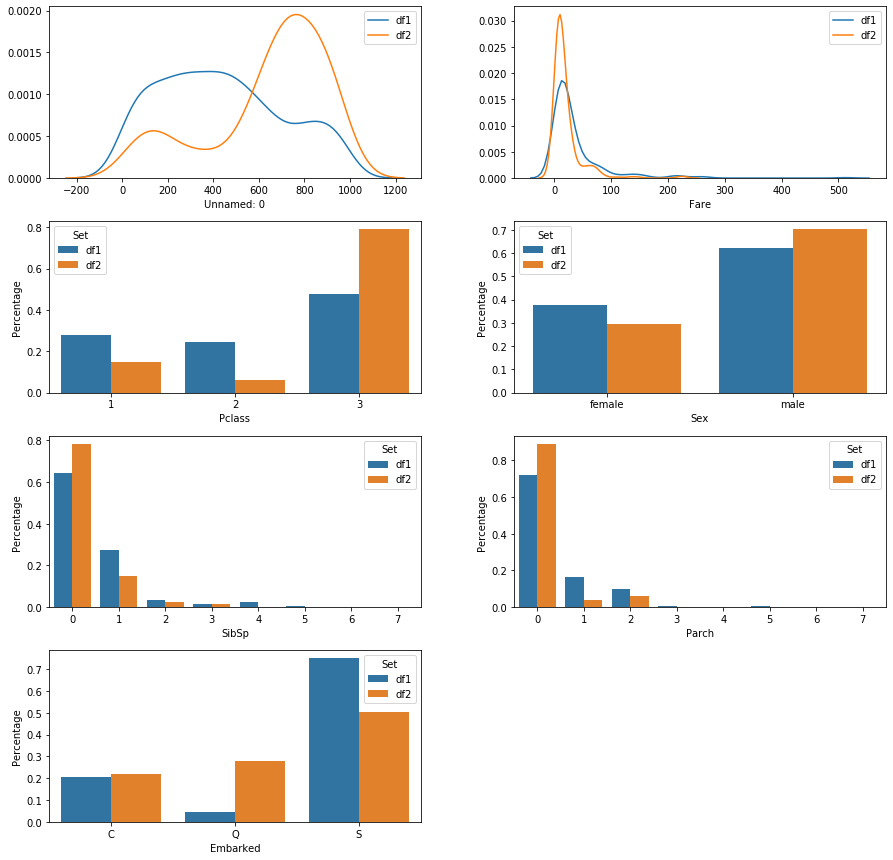

In [9]:
age_present = train.dropna().drop('Age', 1)
age_missing = train[train.isnull().any(axis=1)].drop('Age', 1)

cat_dtype = pd.api.types.CategoricalDtype(categories=list(range(8)), ordered=True)
age_present.Parch = age_present.Parch.astype(cat_dtype)
age_missing.Parch = age_missing.Parch.astype(cat_dtype)

age_present.SibSp = age_present.SibSp.astype(cat_dtype)
age_missing.SibSp = age_missing.SibSp.astype(cat_dtype)

distComparison(age_present.drop('Survived', 1), age_missing.drop('Survived', 1))

Il semble que nous ne puissions pas vérifier l’hypothèse MCAR. L'explication semble être que nous sommes moins susceptibles de connaître l'âge des personnes décédées. Comme en témoigne la proportion beaucoup plus grande de passagers de la classe inférieure, le pic plus net dans les tarifs plus bas et une légère asymétrie à l’égard des hommes.

De manière plus significative encore, il semble que les personnes qui se sont embarquées à Queenstown (Q) ont un taux beaucoup plus élevé d’âge manquant.

Remarque: Il serait préférable d'utiliser une mesure plus objective de MCAR, comme le test de Little : (TODO)

## Baseline de prédiction

Sans l'utilisation des données `Age`, notre prédicteur sera un classificateur par forêt aléatoire avec les paramètres affichés. Toutes les estimations d'erreur de test sont obtenues par une validation croisée 10 fois.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Préparation des données afin d'enlever les données catégoriques
def prepForModel(df):
    new_df = df.copy()
    # Classe de cabine en entier
    new_df.Pclass = new_df.Pclass.astype("int")
    # Sexe binaire
    new_df.Sex.cat.categories = [0, 1]
    new_df.Sex = new_df.Sex.astype("int")
    # Port d'embarquement en entier (on pourrait utiliser une variable dummy ? tryit ;-))
    new_df.Embarked.cat.categories = [0, 1, 2]
    new_df.Embarked = new_df.Embarked.astype("int")
    return new_df

# Même pipeline pour le train et le test.
train_cl = prepForModel(train)
test_cl = prepForModel(test)

# Sélection des colonnes sans l'âge
Xcol = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
Ycol = 'Survived'
X = train_cl[Xcol]
Y = train_cl[Ycol]

# Mémorisation des datasets avant qu'on ne fasse d'autres transformations.
Xbase = X
Ybase = Y

# Classification par forêt aléatoire (Random Forest en anglais, ou RF.)
rf = RandomForestClassifier(n_estimators=1000,
                           max_depth=None,
                           min_samples_split=10)

baseline_err = cross_val_score(rf, X, Y, cv=10, n_jobs=-1).mean()
print("[BASELINE] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(X), baseline_err))

[BASELINE] Estimation RF sur Test (n = 981, 10-fold CV): 0.7357720907794546


#### Suppression simple des données manquantes 

In [11]:
Xdel = train_cl.dropna()[Xcol + ['Age']]
Ydel = train_cl.dropna()[Ycol]

deletion_err = cross_val_score(rf, Xdel, Ydel, cv=10, n_jobs=-1).mean()
print("[DELETION] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(Xdel), deletion_err))

[DELETION] Estimation RF sur Test (n = 718, 10-fold CV): 0.7480355113940875


#### Substitution par la moyenne

In [12]:
train_cl = prepForModel(train)
train_cl.Age = train_cl.Age.fillna(train_cl.Age.mean(skipna=True))

Xmean = train_cl[Xcol + ['Age']]
Ymean = train_cl[Ycol]

mean_err = cross_val_score(rf, Xmean, Ymean, cv=10, n_jobs=-1).mean()
print("[MEAN] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(Xmean), mean_err))

[MEAN] Estimation RF sur Test (n = 981, 10-fold CV): 0.7632105825772983


#### Régression déterministe et aléatoire

In [13]:
train_cl = prepForModel(train)
train_reg = train_cl.dropna()

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

Xrcol = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
Yrcol = 'Age'

X_reg = train_reg[Xrcol]
Y_reg = train_reg[Yrcol]

age_lm = LinearRegression()
age_lm.fit(X_reg, Y_reg)
abs_residuals = np.absolute(Y_reg - age_lm.predict(X_reg))

nan_inds = train_cl.Age.isnull().to_numpy().nonzero()[0]
train_cl2 = train_cl.copy()

for i in nan_inds:
    train_cl['Age'].at[i] = age_lm.predict(train_cl.loc[i, Xrcol].values.reshape(1, -1))

Xreg = train_cl[Xcol + ['Age']]
Yreg = train_cl[Ycol]
    
reg_err = cross_val_score(rf, Xreg, Yreg, cv=10, n_jobs=-1).mean()
print("[DETERMINISTIC REGRESSION] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(Xreg), reg_err))

for i in nan_inds:
    detreg = age_lm.predict(train_cl2.loc[i, Xrcol].values.reshape(1, -1))
    randreg = np.random.normal(detreg, np.random.choice(abs_residuals))
    train_cl2['Age'].at[i] = randreg
    
Xrandreg = train_cl2[Xcol + ['Age']]
Yrandreg = train_cl2[Ycol]
    
randreg_err = cross_val_score(rf, Xrandreg, Yrandreg, cv=10, n_jobs=-1).mean()
print("[RANDOM REGRESSION] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(Xrandreg), randreg_err))

[DETERMINISTIC REGRESSION] Estimation RF sur Test (n = 981, 10-fold CV): 0.7714266587609739
[RANDOM REGRESSION] Estimation RF sur Test (n = 981, 10-fold CV): 0.7631584092556111


#### MICE

In [ ]:
#!pip install fancyimpute 
# En cas de problème avec cvxpy sur windows : http://www.lfd.uci.edu/~gohlke/pythonlibs/
from fancyimpute import IterativeImputer # La méthode MICE a été renommée récemment.

train_cl = prepForModel(train)

X = train_cl.loc[:, Xcol + ['Age']]
Y = train_cl.loc[:, Ycol]

Xmice = IterativeImputer().fit_transform(X)
Ymice = Y

mice_err = cross_val_score(rf, Xmice, Y, cv=10, n_jobs=-1).mean()
print("[MICE] Estimation RF sur Test (n = {}, 10-fold CV): {}".format(len(Xmice), mice_err))

#### KNN (données normalisées)

Il peut sembler étrange, dans ce qui suit, de normaliser les données X puisque plusieurs facteurs (colonnes) correspondent à 
des variables binaires ou ordinales. L'idée est de rapporter tous ces facteurs à la même échelle, entre 0 et 1, 
afin de calculer correctement les 'distances' entre les passagers et trouver leurs plus proches voisins. 
Sans la normalisation (ou standardisation), les distances ne dépendraient principalement que des différences de 
prix du billet (Fare).

L'identification des plus proches voisins permet ensuite l'imputation des données manquantes. La normalisation des données 
X n'affecte pas l'étape suivante, la classification des données par forêts aléatoires.


In [14]:
from fancyimpute import KNN
from sklearn.model_selection import StratifiedKFold

train_cl = prepForModel(train)

Xcol = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_cl.loc[:, Xcol + ['Age']]
Y = train_cl.loc[:, Ycol]

def standardize(s):
    return s.sub(s.min()).div((s.max() - s.min()))

Xnorm = X.apply(standardize, axis=0)
kvals = np.linspace(1, 100, 20, dtype='int64')

knn_errs = []
for k in kvals:
    knn_err = []
    Xknn = KNN(k=k, verbose=False).fit_transform(Xnorm)
    knn_err = cross_val_score(rf, Xknn, Y, cv=10, n_jobs=-1).mean()

    knn_errs.append(knn_err)
    print("[KNN] Estimation RF sur Test (n = {}, k = {}, 10-fold CV): {}".format(len(Xknn), k, np.mean(knn_err)))

ModuleNotFoundError: No module named 'fancyimpute'

In [15]:
sns.set_style("darkgrid")
_ = plt.plot(kvals, knn_errs)
_ = plt.xlabel('K')
_ = plt.ylabel('10-fold CV Error Rate')

knn_err = max(knn_errs)
k_opt = kvals[knn_errs.index(knn_err)]

Xknn = KNN(k=k_opt, verbose=False).fit_transform(Xnorm)
Yknn = Y

print("[BEST KNN] Estimation RF sur Test (n = {}, k = {}, 10-fold CV): {}".format(len(Xknn), k_opt, np.mean(knn_err)))

NameError: name 'kvals' is not defined

#### En résumé... 

In [16]:
errs = {'BEST KNN (k = {})'.format(k_opt): knn_err,  
        'DETERMINISTIC REGRESSION': reg_err, 
        'RANDOM REGRESSION': randreg_err,
        'MICE': mice_err,
        'MEAN': mean_err,
        'DELETION': deletion_err, 
        'BASELINE': baseline_err}

err_df = pd.DataFrame.from_dict(errs, orient='index')
err_df.index.name = 'Imputation Method'
err_df.reset_index(inplace=True)
err_df.columns = ['Imputation', ' Estimation sur Test  (10-fold CV)']

ax = sns.barplot(x=err_df.columns[1], y=err_df.columns[0], order=list.sort(list(errs.values())), data=err_df)
ax.set_xlabel(err_df.columns[1])
ax.set_ylabel('')
_ = plt.xlim(0.7, 0.8)

NameError: name 'k_opt' is not defined

### Que faut-il tirer de ce graphique ?

Que si on complète les données manquantes avec divers modèles on améliore le pouvoir de prédiction ... en ajoutant un biais dans les données :-)